In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from datetime import datetime
%matplotlib inline
warnings.filterwarnings('ignore')

# Loading the dataset

In [41]:
df = pd.read_csv('_data set_sales.csv')
df.head()

,item_id,product_name,Product_type,sales _date,unit_price,unit_sale,discounted_price,total_price,Gender,Location,Brand_of_the_product
0,AU001,fruti,Liquid,12-09-2021,30,10,250,300,1,xyz,YYYY
1,AU002,Sanitiser,Liquid,12-09-2021,120,5,220,600,0,yyx,ZZZZ
2,AU003,Dish Washer,Liquid,07-05-2021,3545,246,334,872070,0,pqr,SSSS
3,AU004,Handwash,Liquid,05-03-2021,1102,140,466,154280,1,rta,KLAS
4,AU005,Dish Washer,Liquid,16-09-2021,1464,300,349,439200,0,kmn,GREATBEAR ST BTX


In [42]:
# statisctical info
df.describe()

,unit_price,unit_sale,discounted_price,total_price,Gender
count,1100.000000,1100.000000,1100.000000,1.100000e+03,1100.000000
mean,3515.487273,176.130909,370.461818,6.312567e+05,0.508182
std,1017.378615,77.078828,110.114042,3.365225e+05,0.500160
min,30.000000,1.000000,150.000000,3.000000e+02,0.000000
25%,3016.000000,121.000000,288.750000,3.766372e+05,0.000000
50%,3676.000000,180.000000,372.500000,6.108280e+05,1.000000
75%,4307.000000,241.000000,456.250000,8.880630e+05,1.000000
max,4996.000000,300.000000,599.000000,1.438642e+06,1.000000


In [43]:
# datatype attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   item_id               1100 non-null   object
 1   product_name          1100 non-null   object
 2   Product_type          1100 non-null   object
 3   sales _date           1100 non-null   object
 4   unit_price            1100 non-null   int64 
 5   unit_sale             1100 non-null   int64 
 6   discounted_price      1100 non-null   int64 
 7   total_price           1100 non-null   int64 
 8   Gender                1100 non-null   int64 
 9   Location              1100 non-null   object
 10  Brand_of_the_product  1100 non-null   object
dtypes: int64(5), object(6)
memory usage: 94.7+ KB


In [44]:
# converting sales_date in datetime format
df['sales _date'] = pd.to_datetime(df['sales _date'])

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   item_id               1100 non-null   object        
 1   product_name          1100 non-null   object        
 2   Product_type          1100 non-null   object        
 3   sales _date           1100 non-null   datetime64[ns]
 4   unit_price            1100 non-null   int64         
 5   unit_sale             1100 non-null   int64         
 6   discounted_price      1100 non-null   int64         
 7   total_price           1100 non-null   int64         
 8   Gender                1100 non-null   int64         
 9   Location              1100 non-null   object        
 10  Brand_of_the_product  1100 non-null   object        
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 94.7+ KB


In [46]:
# checking unique value in dataset
df.apply(lambda x: len(x.unique()))

item_id                 1100
product_name              57
Product_type               5
sales _date              351
unit_price               939
unit_sale                277
discounted_price         391
total_price             1099
Gender                     2
Location                  24
Brand_of_the_product      29
dtype: int64

In [47]:
df.shape

(1100, 11)

# Preprocessing the dataset 

In [48]:
# check for null values
df.isnull().sum()

item_id                 0
product_name            0
Product_type            0
sales _date             0
unit_price              0
unit_sale               0
discounted_price        0
total_price             0
Gender                  0
Location                0
Brand_of_the_product    0
dtype: int64

In [49]:
# checking for categorical attributes
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['item_id ',
 'product_name',
 'Product_type',
 'Location',
 'Brand_of_the_product']

In [50]:
cat_col.remove('item_id ')
cat_col

['product_name', 'Product_type', 'Location', 'Brand_of_the_product']

In [51]:
# print the categorical columns
for col in cat_col:
    print(col)
    print(df[col].value_counts())
    print()

product_name
Tie                    63
Belt(L)                52
Torch                  42
Atlas                  42
Wallets                41
Diary                  41
Belt                   40
Laxmikanth             36
Scrap Book             34
Capacitor              33
LED                    31
Globe                  30
Cu-Wire                29
Spectrum               29
Bucket                 28
Stablizer              27
Tube Light             25
Motor                  25
Dish Washer            25
Handkerchief           24
Mug                    23
Socket                 22
Sanitiser              22
Liquid Detergent       21
Soap Bar               20
Suitcase               20
Handwash               19
Tooth Brush            18
Shoes                  18
Handwash(F)            18
Vests                  17
Smart Phone            15
Cap                    15
Antiseptic             15
Speaker                15
Cough Syrup            14
Mop                    13
Study Lamp             11

# Exploratory Data Analysis

<AxesSubplot:xlabel='unit_price', ylabel='Density'>

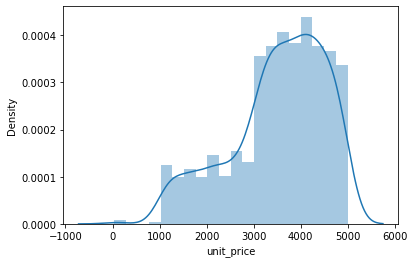

In [52]:
sns.distplot(df['unit_price'])

<AxesSubplot:xlabel='discounted_price', ylabel='Density'>

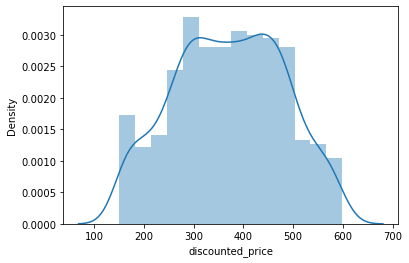

In [78]:
sns.distplot(df['discounted_price'])

<AxesSubplot:xlabel='total_price', ylabel='Density'>

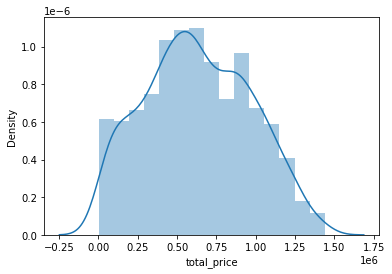

In [54]:
sns.distplot(df['total_price'])

In [55]:
# WHAT IS THE OVERALL SALES TREND? 

# Getting month year from order_date
df['month_year'] = df['sales _date'].apply(lambda x: x.strftime('%Y-%m'))

In [56]:
# grouping month_year by discount
df_temp = df.groupby('month_year').sum()['discounted_price'].reset_index()

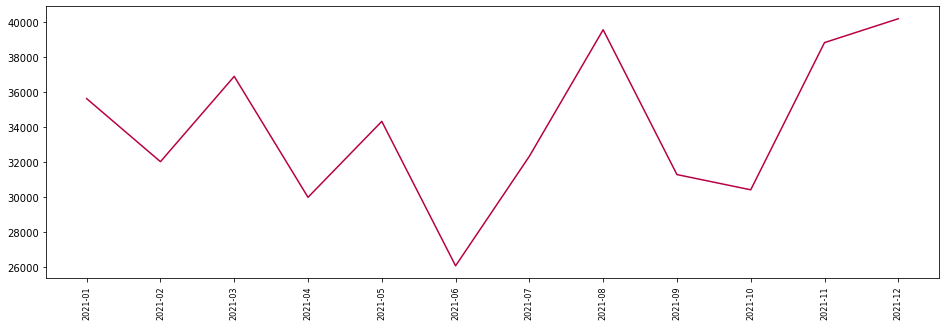

In [57]:
plt.figure(figsize=(16,5))
plt.plot(df_temp['month_year'], df_temp['discounted_price'], color='#b80045')
plt.xticks(rotation='vertical', size=8)
plt.show()

In [58]:
# grouping month_year by total price
df_temp = df.groupby('month_year').sum()['total_price'].reset_index()

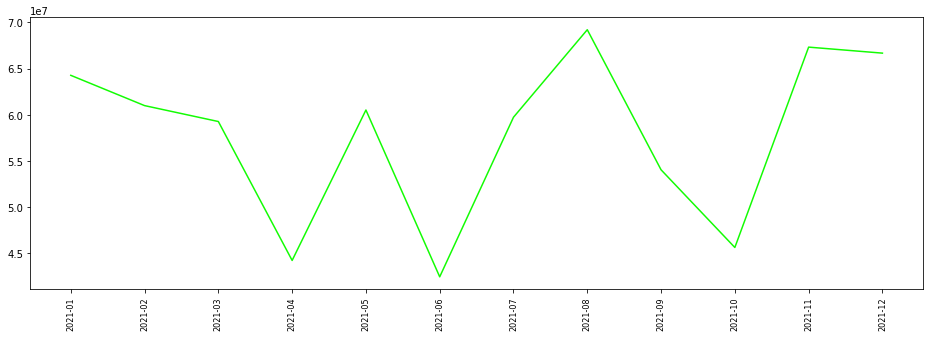

In [59]:
plt.figure(figsize=(16,5))
plt.plot(df_temp['month_year'], df_temp['total_price'], color='#13fc03')
plt.xticks(rotation='vertical', size=8)
plt.show()

In [60]:
# grouping month_year by sales
df_temp = df.groupby('month_year').sum()['unit_sale'].reset_index()

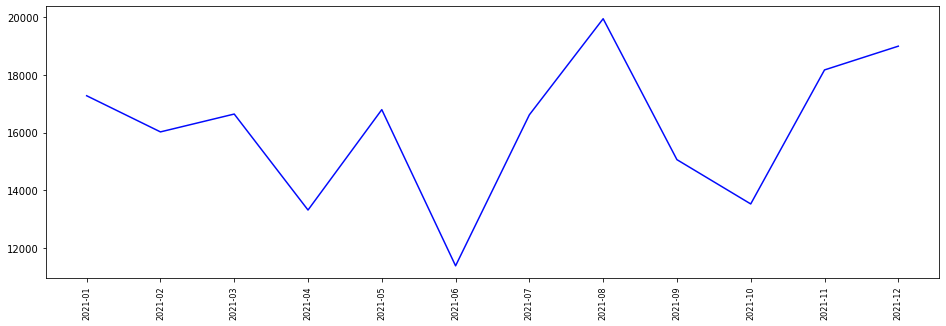

In [61]:
plt.figure(figsize=(16,5))
plt.plot(df_temp['month_year'], df_temp['unit_sale'], color='#030bfc')
plt.xticks(rotation='vertical', size=8)
plt.show()

[Text(0, 0, 'fruti'),
 Text(1, 0, 'Sanitiser'),
 Text(2, 0, 'Dish Washer'),
 Text(3, 0, 'Handwash'),
 Text(4, 0, 'Handwash(F)'),
 Text(5, 0, 'Liquid Detergent'),
 Text(6, 0, 'Soap Bar'),
 Text(7, 0, 'Tooth Brush'),
 Text(8, 0, 'Mug'),
 Text(9, 0, 'Bucket'),
 Text(10, 0, 'Handkerchief'),
 Text(11, 0, 'Tie'),
 Text(12, 0, 'Belt(L)'),
 Text(13, 0, 'Shoes'),
 Text(14, 0, 'Cap'),
 Text(15, 0, 'Belt'),
 Text(16, 0, 'Wallets'),
 Text(17, 0, 'Fruti'),
 Text(18, 0, 'Liquid Detergent(N)'),
 Text(19, 0, 'Tie Pin'),
 Text(20, 0, 'Trousers'),
 Text(21, 0, 'Socks'),
 Text(22, 0, 'Capacitor'),
 Text(23, 0, 'Torch'),
 Text(24, 0, 'LED'),
 Text(25, 0, 'Speaker'),
 Text(26, 0, 'Emer. Light'),
 Text(27, 0, 'Smart Phone'),
 Text(28, 0, 'Study Lamp'),
 Text(29, 0, 'Stablizer'),
 Text(30, 0, 'Cu-Wire'),
 Text(31, 0, 'Scrap Book'),
 Text(32, 0, 'Pencil'),
 Text(33, 0, 'Crayons'),
 Text(34, 0, 'Pen'),
 Text(35, 0, 'A4 Paper'),
 Text(36, 0, 'Socket'),
 Text(37, 0, 'Tube Light'),
 Text(38, 0, 'Motor'),
 Text(39

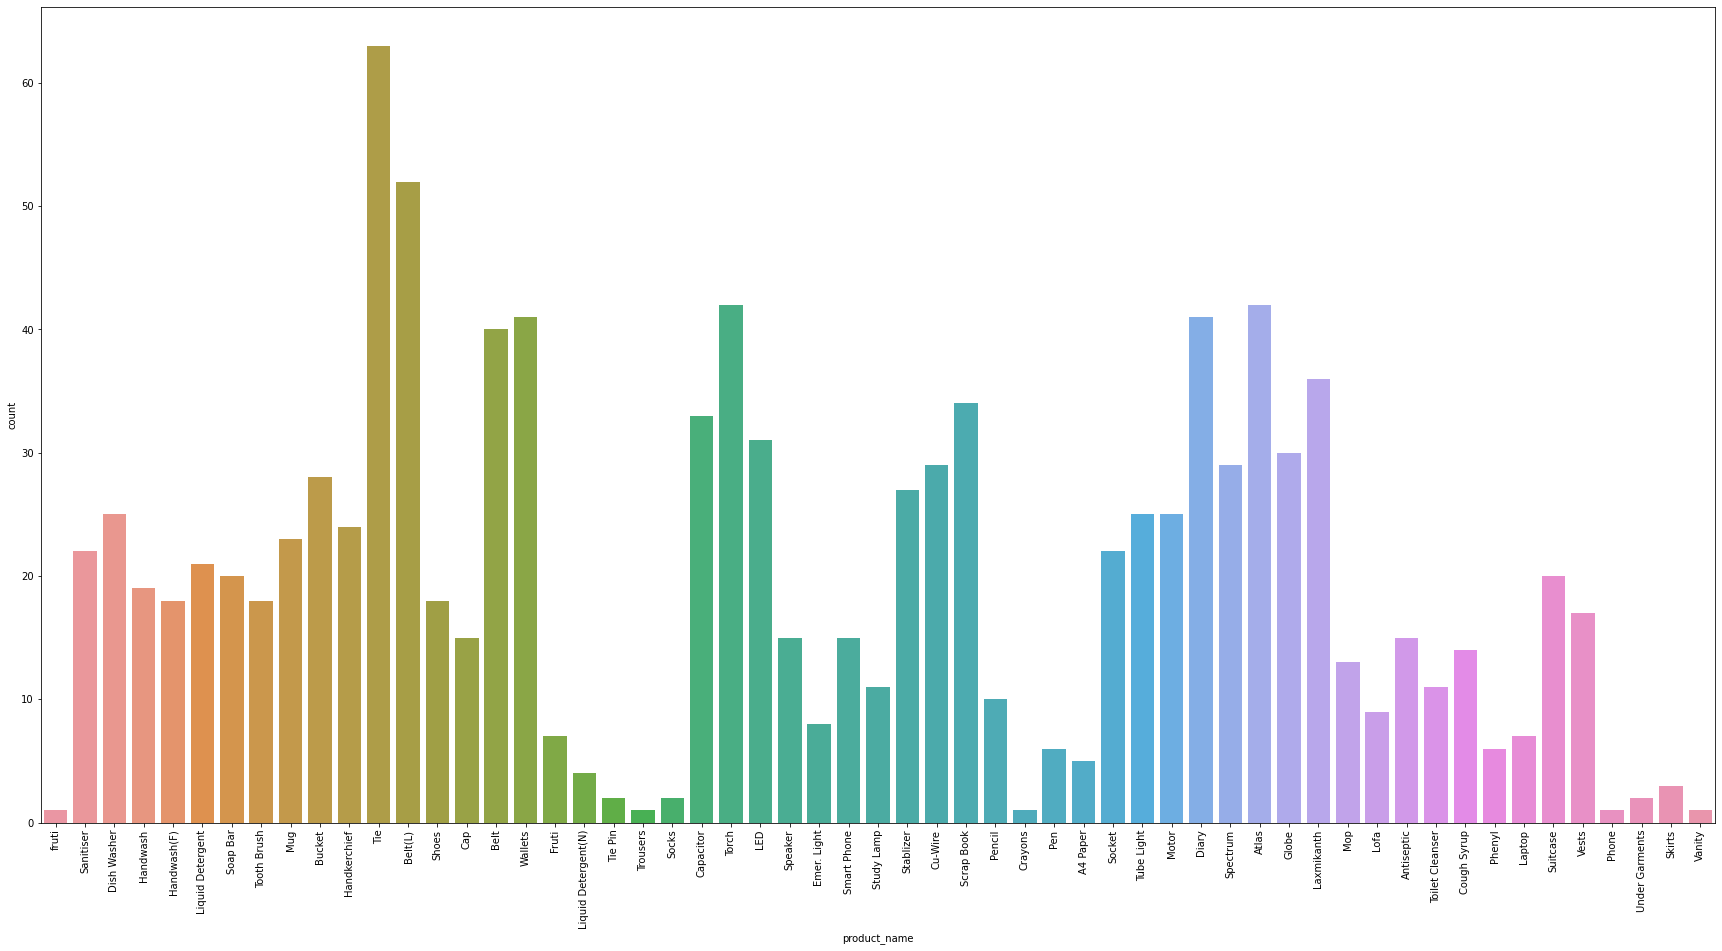

In [62]:
plt.figure(figsize=(30,15))
l = list(df['product_name'].unique())
chart = sns.countplot(df["product_name"])
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

In [63]:
# Top 10 Products by sales

# Grouping Product by sales
prod_sales = pd.DataFrame(df.groupby('product_name').sum()['unit_sale'])

# Sorting the dataframe in descending order
prod_sales.sort_values(by=['unit_sale'],inplace=True,ascending=False)

# Top 10 products by sales
prod_sales[:10]

,unit_sale
product_name,
Tie,11973
Belt(L),10689
Torch,8008
Atlas,7688
Wallets,7568
Belt,7540
Diary,7012
Scrap Book,6661
Laxmikanth,5997


In [64]:
# Top 10 Products by unit_price

# Grouping Product by unit_price
prod_sales = pd.DataFrame(df.groupby('product_name').sum()['unit_price'])

# Sorting the dataframe in descending order
prod_sales.sort_values(by=['unit_price'],inplace=True,ascending=False)

# Top 10 products by unit_price
prod_sales[:10]

,unit_price
product_name,
Tie,236476
Belt(L),193506
Wallets,166196
Torch,155480
Belt,153696
Diary,151207
Atlas,146191
Laxmikanth,121850
Scrap Book,116783


# Correlation Matrix

<AxesSubplot:>

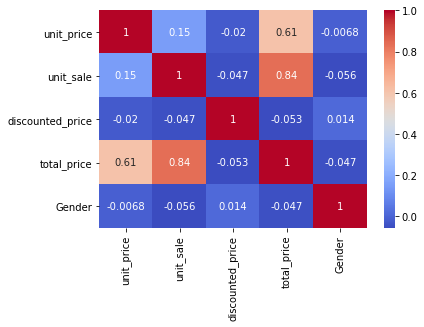

In [65]:
corr = df.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [66]:
#x = df.drop(columns=['item_id ','Gender','Location'])

# Label Encoding

In [67]:
"""from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_col = ['product_name', 'Product_type', 'Location', 'Brand_of_the_product']
for col in cat_col:
    df[col] = le.fit_transform(df[col])"""

"from sklearn.preprocessing import LabelEncoder\nle = LabelEncoder()\ncat_col = ['product_name', 'Product_type', 'Location', 'Brand_of_the_product']\nfor col in cat_col:\n    df[col] = le.fit_transform(df[col])"

In [68]:
df = pd.get_dummies(df,columns=['product_name', 'Product_type','Brand_of_the_product'])

In [69]:
df.head()

,item_id,sales _date,unit_price,unit_sale,discounted_price,total_price,Gender,Location,month_year,product_name_A4 Paper,...,Brand_of_the_product_PARKCITY,Brand_of_the_product_PASM,Brand_of_the_product_QJKH,Brand_of_the_product_RRRR,Brand_of_the_product_SSSS,Brand_of_the_product_TIGRISSFFBTX,Brand_of_the_product_TMSO,Brand_of_the_product_XXXX,Brand_of_the_product_YYYY,Brand_of_the_product_ZZZZ
0,AU001,2021-12-09,30,10,250,300,1,xyz,2021-12,0,...,0,0,0,0,0,0,0,0,1,0
1,AU002,2021-12-09,120,5,220,600,0,yyx,2021-12,0,...,0,0,0,0,0,0,0,0,0,1
2,AU003,2021-07-05,3545,246,334,872070,0,pqr,2021-07,0,...,0,0,0,0,1,0,0,0,0,0
3,AU004,2021-05-03,1102,140,466,154280,1,rta,2021-05,0,...,0,0,0,0,0,0,0,0,0,0
4,AU005,2021-09-16,1464,300,349,439200,0,kmn,2021-09,0,...,0,0,0,0,0,0,0,0,0,0


# Input Split

In [70]:
X = df.drop(columns=['item_id ','Gender','Location'])
y = df['unit_sale']

In [71]:
X.head()

,sales _date,unit_price,unit_sale,discounted_price,total_price,month_year,product_name_A4 Paper,product_name_Antiseptic,product_name_Atlas,product_name_Belt,...,Brand_of_the_product_PARKCITY,Brand_of_the_product_PASM,Brand_of_the_product_QJKH,Brand_of_the_product_RRRR,Brand_of_the_product_SSSS,Brand_of_the_product_TIGRISSFFBTX,Brand_of_the_product_TMSO,Brand_of_the_product_XXXX,Brand_of_the_product_YYYY,Brand_of_the_product_ZZZZ
0,2021-12-09,30,10,250,300,2021-12,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2021-12-09,120,5,220,600,2021-12,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2021-07-05,3545,246,334,872070,2021-07,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,2021-05-03,1102,140,466,154280,2021-05,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2021-09-16,1464,300,349,439200,2021-09,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model Training and Testing

In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
print("Shape of X_train:",X_train.shape)
print("Shape of X_test:",X_test.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_test:",y_test.shape)

Shape of X_train: (880, 97)
Shape of X_test: (220, 97)
Shape of y_train: (880,)
Shape of y_test: (220,)


# Linear Regression

In [75]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

TypeError: invalid type promotion

In [ ]:
model.predict(y_test)